# ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú Î∞è ÏûêÏó∞Ïñ¥ Ï≤òÎ¶¨

In [1]:
# import nltk 
# # punkt, stopwords download
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [137]:
import pandas as pd
import numpy as np
import copy
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
import nltk
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import re, joblib
import konlpy
from konlpy.tag import Okt 
okt = Okt()
import string
import threading

In [42]:
os.chdir('/home/miwoos/WorkSpace/GoogleDrive/Ï†úÏ£º_Ï†ÑÍ∏∞Ï∞®/data/')

In [44]:
ls

 elecafe.csv
'pietest (df1798e6) (d8200025) (d8200025).png'
'pietest (df1798e6) (df1798e6) (df1798e6) (df1798e6).png'
 Í¥ÄÎ†®ÌÇ§ÏõåÎìú.csv
'Í∏çÎ∂ÄÏ†ï (4de45444) (4de45444).png'
 ÎÑ§Ïù¥Î≤Ñ-Ï†úÏ£ºÏ†ÑÍ∏∞Ï∞®ÌõÑÍ∏∞ÌÜµÌï©.csv
 ÎäêÏòÅÎÇòÏòÅÏ†ÑÍ∏∞Ï∞®ÌÅ¨Î°§ÎßÅ.csv
 ÎäêÏòÅÎÇòÏòÅÏ†ÑÍ∏∞Ï∞®ÌÅ¨Î°§ÎßÅ.csv.part
'Î≥∏Î¨∏ Í≤ÄÏÉâ Í≤∞Í≥º_2022.03.06.xlsx'
'Ï†ÑÍ∏∞Ï∞® ÎèôÌò∏Ìöå Ï†ÑÍ∏∞Ï∞®ÌÅ¨Î°§ÎßÅ.csv'
 Ï†ÑÍ∏∞Ï∞®Í¥ÄÎ†®Í≤ÄÏÉâÏñ¥Ïù∏Í∏∞Ïàú.csv
 Ï†ÑÍ∏∞Ï∞®Í¥ÄÏã¨ÎèÑÏßÄÏó≠.csv
 Ï†ÑÍ∏∞Ï∞®Í¥ÄÏã¨Ï¶ùÍ∞Ä.csv
 Ï†ÑÍ∏∞Ï∞®ÌÇ§ÏõåÎìúÍ¥ÄÎ†®Ï£ºÏ†úÏù∏Í∏∞Ïàú.csv
 Ï†ÑÏ≤¥Î≥∏Î¨∏ÏùòÎåìÍ∏ÄÍ≤∞Í≥º_2022.03.06.xlsx
 Ï†úÏÇ¨Î™®ÌÅ¨Î°§ÎßÅ.csv
 Ìà¨ÌîåÎü≠Ïä§sjeju.csv


In [45]:
df_naver= pd.read_csv('ÎÑ§Ïù¥Î≤Ñ-Ï†úÏ£ºÏ†ÑÍ∏∞Ï∞®ÌõÑÍ∏∞ÌÜµÌï©.csv')

In [9]:
df = pd.read_csv('/home/miwoos/WorkSpace/GoogleDrive/Ï†úÏ£º_Ï†ÑÍ∏∞Ï∞®/data/elecafe.csv')

In [107]:
df_toflux= pd.read_csv('Î≥∏Î¨∏ Í≤ÄÏÉâ Í≤∞Í≥º_2022.03.06.xlsx')

In [124]:
df_tofluxfull= pd.read_excel('/home/miwoos/WorkSpace/Jeju_Electric_Vehicle_analysis/Î≥∏Î¨∏ Í≤ÄÏÉâ Í≤∞Í≥º_2022.03.06.xlsx')

In [126]:
df_tofluxfull.Contents

0         ‚ñ∂ ÏïÑÏù¥Ïò§Îãâ5 Ìú†Î≤†Ïù¥Ïä§ 3000Ïùò Í∞ÄÏπò_x000D_\n_x000D_\nÏÑúÎπÑÏä§ÏÑºÌÑ∞ Í∞î...
1         ‚ñ∂ ÌòÑÎåÄÏ∞® ÏïÑÏù¥Ïò§Îãâ5 vs ÌÖåÏä¨Îùº Î™®Îç∏Y, Î≠ò ÏÇ¥ÍπåÏöî?_x000D_\n_x000D_...
2         ‚ñ∂ (ÏôÑÌåê) 2020.5 Î°ØÎç∞Î†åÌÑ∞Ïπ¥ Ïã†Ï∞®Ïû•! ÌÖåÏä¨ÎùºÌîÑÎ°úÎ™®ÏÖò 105ÎåÄ Í≥µÏßÄÎìúÎ¶ΩÎãàÎã§. ...
3         ‚ñ∂ ÏΩîÎÇòev Ï∂©Ï†ÑÏ§ë ÌôîÏû¨Î°ú Ï†ÑÏÜê Îê¨ÏäµÎãàÎã§_x000D_\n_x000D_\nÏïàÎÖïÌïòÏÑ∏Ïöî,...
4         ‚ñ∂ Ï†ÑÍ∏∞Ï∞®Ï∂©Ï†ÑÏöîÍ∏à ÏõêÎ≥µÎ∞è Ï°∞ÏÜçÌïú Ï∂©Ï†ÑÏù∏ÌîÑÎùºÌôïÏ∂©ÏóêÎåÄÌïú Íµ≠ÎØºÏ≤≠ÏõêÏùÑ ÏßÑÌñâÌïòÎ†§Îãà ÏùΩÏñ¥Î≥¥ÏÖîÏöî...
                                ...                        
394815    ‚ñ∂ C40 ÎåÄÍ∏∞ÏàúÎ≤à Î¨∏Ïùò_x000D_\n_x000D_\n* Í¥ÄÎ†®Îêú Ï£ºÏ†úÏóê ÎåÄÌï¥ ÎØ∏Î¶¨...
394816    ‚ñ∂ ÏôÄ.. ÏßÑÏßú ÎØ∏¬≠Ï≥£ÎÇòÎ¥êÏöî „Öã„Öã_x000D_\n_x000D_\nÏø†¬≠Ìå°Ïù¥ ÎìúÎîîÏñ¥ ÎØ∏...
394817    ‚ñ∂ ÎãàÎ°ú ev ÌöåÏÉùÏ†úÎèô ÏßàÎ¨∏_x000D_\n_x000D_\nÏïàÎÖïÌïòÏÑ∏Ïöî ÎãàÎ°ú ev Ï§ë...
394818    ‚ñ∂ Í∞ÄÏûÖÏù∏ÏÇ¨ ÎìúÎ¶ΩÎãàÎã§_x000D_\n_x000D_\n1. ÏûêÍ∏∞ÏÜåÍ∞ú : ÏïàÎÖïÌïòÏÑ∏Ïöî~e...
394819    ‚ñ∂ Ï∑®ÏÜå

In [120]:
df_toflux.head(3)

Ï†úÎ™©     Ïπ¥ÌéòÎ™Ö  \
0  Ï†ÑÍ∏∞Ï∞®Ï∂©Ï†ÑÏöîÍ∏à ÏõêÎ≥µÎ∞è Ï°∞ÏÜçÌïú Ï∂©Ï†ÑÏù∏ÌîÑÎùºÌôïÏ∂©ÏóêÎåÄÌïú Íµ≠ÎØºÏ≤≠ÏõêÏùÑ ÏßÑÌñâÌïòÎ†§Îãà ÏùΩÏñ¥Î≥¥ÏÖîÏöî~(...  Ï†ÑÍ∏∞Ï∞®ÎèôÌò∏Ìöå   
1                                         ÏΩîÎÇò Í∏âÎ∞úÏßÑ Ïã§ÌôîÎÉê  Ï†ÑÍ∏∞Ï∞®ÎèôÌò∏Ìöå   
2  ÏïΩ930ÏùºÏùÑ Ïö¥ÌñâÌïú ÌõÑÏóê Ïö¥ÌñâÌïòÎ©¥ÏÑú ÎäêÎÇÄÏ†êÏùÑ ÏàòÏ†ï Ï∂îÍ∞ÄÌï¥ÏÑú Ï†ÅÏñ¥Î≥¥ÏïòÏäµÎãàÎã§ 2020ÎÖÑ...  Ï†ÑÍ∏∞Ï∞®ÎèôÌò∏Ìöå   

                  ÏûëÏÑ±ÎÇ†Ïßú                                                 ÎÇ¥Ïö©  \
0  2020-05-13 15:19:00  ‚ñ∂ Ï†ÑÍ∏∞Ï∞®Ï∂©Ï†ÑÏöîÍ∏à ÏõêÎ≥µÎ∞è Ï°∞ÏÜçÌïú Ï∂©Ï†ÑÏù∏ÌîÑÎùºÌôïÏ∂©ÏóêÎåÄÌïú Íµ≠ÎØºÏ≤≠ÏõêÏùÑ ÏßÑÌñâÌïòÎ†§Îãà ÏùΩÏñ¥Î≥¥ÏÖîÏöî...   
1  2021-03-04 21:15:00  ‚ñ∂ ÏΩîÎÇò Í∏âÎ∞úÏßÑ Ïã§ÌôîÎÉê_x000D_\n_x000D_\nÏ£ºÏ∞® Ï∞®Îã®Í∏∞ Îö´Í≥† ÏæÖ‚Ä¶Ï†ÑÍ∏∞Ï∞®ÎèÑ...   
2  2020-01-03 04:57:00  ‚ñ∂ ÏïΩ930ÏùºÏùÑ Ïö¥ÌñâÌïú ÌõÑÏóê Ïö¥ÌñâÌïòÎ©¥ÏÑú ÎäêÎÇÄÏ†êÏùÑ ÏàòÏ†ï Ï∂îÍ∞ÄÌï¥ÏÑú Ï†ÅÏñ¥Î≥¥ÏïòÏäµÎãàÎã§ 202...   

    Ï°∞ÌöåÏàò Í∏çÎ∂ÄÏ†ï                                    Url        Ïõî     ÎÖÑ  
0  2461   P  https://cafe.naver.com/allfm01/463393  2020.05  2020  
1   753   N  https://cafe.naver.com/allfm01/577259  2021.03  2021  
2   690   P  https://cafe.naver.com/allfm01/413286  2020.01  2020

In [5]:
pwd

'/home/miwoos/WorkSpace/Jeju_Electric_Vehicle_analysis'

In [35]:
df.Ïπ¥ÌéòÎ™Ö.unique()

array(['Ï†úÏÇ¨Î™®', 'ÎäêÏòÅÎÇòÏòÅ', 'Ï†ÑÍ∏∞Ï∞®ÎèôÌò∏Ìöå'], dtype=object)

In [36]:
df[df.Ïπ¥ÌéòÎ™Ö=='Ï†ÑÍ∏∞Ï∞®ÎèôÌò∏Ìöå']

Ï†úÎ™©  \
3566                                            Í∏àÏúµÏπòÎ£å   
3567                                        Í≤ΩÎ∂ÄÌïòÏãúÍ∞Ñ Ï∞®Ïù¥   
3568                              Ï†úÏ£ºÎèÑ Ïó¨ÌñâÏßÄ Ï∂îÏ≤ú Î∂ÄÌÉÅÎìúÎ¶ΩÎãàÎã§.   
3569                                          Ï†úÏ£º Ìè¥Ïä§ÌÉÄ   
3570                            Í≤ΩÎß§Ïóê BMW i3Í∞Ä ÏôïÏ∞Ω ÎÇòÏôîÎÑ§Ïöî~   
...                                              ...   
5910   [ÎßÅÌÅ¨Ïä§ÌÅ¨Îû©] 100% ÏàúÏàò Ï†ÑÍ∏∞Ï∞® ‚ÄòSM3 Z.E.‚Äô Î≥¥Í∏â ÏúÑÌï¥ ÌäπÎ≥Ñ Ìï†Ïù∏ Ï†úÍ≥µ   
5911  [ÎßÅÌÅ¨Ïä§ÌÅ¨Îû©] ÏûêÎèôÏ∞® ÏóÖÍ≥Ñ, Ï†úÏ£ºÎèÑ Ï†ÑÍ∏∞Ï∞® ÎØºÍ∞Ñ Î≥¥Í∏â Í≥µÎ™® Ï¥ùÎ†•Ï†Ñ‚Ä¶Í∞ÄÍ≤© Ïù∏Ìïò Ïù¥Ïñ¥Ï†∏   
5912                        Îì±ÏóÖÎ∂ÄÌÉÅÌï¥Ïöî ÌïòÎ∞òÍ∏∞ Ï†ÑÍ∏∞Ï∞®Î•º Ïã†Ï≤≠ÌïòÍ≥†Ïã∂ÏóàÎäîÎç∞   
5913                                              „Öá„Öá   
5914                      Ï†úÏ£ºÎèÑ, ÏÉÅÎ∞òÍ∏∞ Ï†ÑÍ∏∞Ï∞® 226ÎåÄ Í≥µÎ™® 7.3:1   

                                                     ÎÇ¥Ïö©  \
3566                   ÏôÑÎ£åÌïòÏòÄÏäµÎãàÎã§. \nÎÇòÎùºÏóê ÏÑ∏Í∏àÏù¥ÎÇò Ï¢Ä Îçî Ï∂©ÎãπÌï¥Îùº..\n   
3567  Ïú°ÏßÄÎûë Ï†úÏ£ºÎûë Í≤ΩÎ∂ÄÌïòÏãúÍ∞ÑÏù¥ Îã§Î•¥ÎçîÎùºÍ≥†Ïöî.\nÏú°ÏßÄÎäî 11ÏãúÎ∂ÄÌÑ∞ 9Ïãú.\nÏ†úÏ£ºÎäî 10Ïãú...   
3568  Ï†úÍ∞Ä Í≤∞ÌòºÍ∏∞ÎÖêÏùº Ï¶àÏùåÌïòÍ≥† \nÏñºÎßàÏ†Ñ Ïù∏Ïó∞ÏùÑ Îß∫ÏùÄ ÏÇ¨ÎèàÎÇ¥Ïô∏ÏôÄ Ï†úÏ£ºÎèÑ Ïó¨ÌñâÏùÑ ÌïòÎ†§Í≥† Ìï©...   
3569  Ï†úÏ£ºÎèÑ Ìè¥Ïä§ÌÉÄ Ïò§ÌîàÏòàÏ†ïÏù¥ÎçòÎåÄ \n\nÏ†ïÌôïÌïú ÏãúÍ∏∞Îäî ÏïàÎÇòÏò®Í±¥Í∞ÄÏöî?\n\nÌòπÏãú Ïπ¥ÌéòÏóêÏÑú...   
3570  http://www.jejusori.net/news/articleView.html?...   
...                                                 ...   
5910                               Ï∂úÏ≤ò\nÎâ¥Ïä§>ÎèôÏïÑÏùºÎ≥¥ | ÎÑ§Ïù¥Î≤Ñ Îâ¥Ïä§   
5911                               Ï∂úÏ≤ò\nÎâ¥Ïä§>Ï†ÑÏûêÏã†Î¨∏ | ÎÑ§Ïù¥Î≤Ñ Îâ¥Ïä§   
5912  ÌïòÎ∞òÍ∏∞ Ï†ÑÍ∏∞Ï∞®Î•º Ïã†Ï≤≠ÌïòÍ≥†Ïã∂ÏóàÎäîÎç∞\nÏ£ºÏ∞®Ïû•Î¨∏Ï†úÎ°ú Î™ªÌïòÎ°ú ÎÇ¥ÎÖÑ ÏÉÅÎ∞òÍ∏∞Î•º Í∏∞ÎåÄÌï©ÎãàÎã§\nÎì±...   
5913                                                  „Öá   
5914  Ï†úÏ£ºÎèÑ ÏÉÅÎ∞òÍ∏∞ Ï†ÑÍ∏∞Ï∞® Í≥µÎ™®Í≤∞Í≥º Í≤ΩÏüÅÎ•†Ïù¥ ÌèâÍ∑† 7.3:1ÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§. \n \nÏ†úÏ£º...   

                                                     ÎåìÍ∏Ä       Ïú†Ìòï    Ï°∞ÌöåÏàò  \
3566  ÌÅ¨~~~ Ï†ïÏùòÍµ¨ÌòÑÏóê ÎßàÏùåÏù¥ ÏãúÏõêÌï¥ÏßëÎãàÎã§ „Öé\n^^\nÎ≤àÌò∏Í∞ÄÎ¶¨ÏÑ∏Ïöî!!\nÌóâ Í≥†ÎßôÏäµÎãàÎã§...  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ  6,136   
3567  Ï†úÏ£ºÎèÑÎäî ÌïòÎ£®ÏùºÍ≥ºÎ•º ÏùºÏ∞ç ÏãúÏûëÌï¥ÏÑú ÏùºÏ∞ç ÎÅùÎÇ¥ÏÑúÍ∞Ä ÏïÑÎãêÍπåÏöî?\nÏ∞∏Í≥†Î°ú Ï†ÄÎäî14ÎÖÑÎ∂ÄÌÑ∞ ...  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ  6,776   
3568  Ï†úÏ£º Í∞ÄÏãúÎ©¥ Ìï¥ÎèãÏù¥Î≥¥Îü¨ ÏÑ±ÏÇ∞ ÏùºÏ∂úÎ¥â Íº≠ Í∞ÄÎ≥¥ÏÖîÏöî. ÌïúÌï¥Ïóê Ìï¥ÎèãÏù¥ Î≥ºÏàò ÏûàÎäî ÎÇ†ÏùÄ Ïñº...  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ  1,973   
3569  Ï†úÏ£ºÎß§Ïû•ÏùÄ Ïñ∏Ï†ú ÏòàÏ†ïÏù∏ÏßÄÎäî ÏûòÎ™®Î•¥Í≤†ÎÑ§Ïöî\n\nÏÇ¨Ï†ÑÍ≥ÑÏïΩÏûêÎì§Ï§ë Í∏∞Ï°¥ ÏÉùÏÇ∞Î¨ºÎüâ Ïû°ÏùÄÏã†Î∂ÑÎì§...  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ    742   
3570  ÏàòÎ¶¨Ìï¥ÏÑú ÌÉàÎßåÌïúÏ∞®Îäî Î™áÏóÜÏùÑÍ±∞ÏóêÏöî\nÍ∑∏ÎãàÍπêÏöî~\nÏ†ÄÎ†áÍ≤å Ï≤òÎ¶¨Ìï† Î≥¥Ï°∞Í∏à ÏûàÏúºÎ©¥‚Ä¶\nÏ¢ãÏùÄ...  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ    944   
...                                                 ...      ...    ...   
5910  Ï†ïÎ∂Ä Î≥¥Ï°∞Í∏à ÍπåÏßÄ Î∞õÍ≤å ÎêúÎã§Î©¥ ÏóÑÏ≤≠ Ïã∏Í≤å ÏÇ¥Ïàò ÏûàÍ≤†ÎÑ§Ïöî....ÏÑúÏö∏ÏóêÏÑú Îã§Ïãú Î≥¥Ï°∞Í∏à ...  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ    111   
5911  ÏèòÏö∏ ÎÇ¥Ïùº Î∞õÎäîÎç∞ 100ÎßåÏõê ÎÇÆÏïÑÏßÄÎã§Îãà....„Ö†„Ö†\nÏÑúÏö∏ÎèÑ Îã§ÏãúÌïúÎ≤àÎçî Î≥¥Ï°∞Í∏à ÏßÄÏõêÌïò...  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ     84   
5912  Î∞òÍ∞ÄÏõåÏöî~~üòä\nÎÇ¥ÎÖÑÏóê Ï†úÏ£ºÎèÑ Ï†ÑÍ∏∞Ï∞® Í≥µÍ∏âÎüâÏù¥ ÎåÄÎ∞ïÏù¥ÎçòÎç∞ Ï¢ãÏùÄÏÜåÏãù ÏûàÏúºÏãúÍ∏∏...\n...  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ     76   
5913                                                0\n  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ     35   
5914                                               ÎÇ¥Ïö©ÏóÜÏùå  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ     50   

             ÏûëÏÑ±ÎÇ†Ïßú       ÏõîÎ≥Ñ     Ïπ¥ÌéòÎ™Ö    ÎÖÑÎ≥Ñ  
3566  2022.02.25.  2022.02  Ï†ÑÍ∏∞Ï∞®ÎèôÌò∏Ìöå  2022  
3567  2022.03.04.  2022.03  Ï†ÑÍ∏∞Ï∞®ÎèôÌò∏Ìöå  2022  
3568  2022.03.14.  2022.03  Ï†ÑÍ∏∞Ï∞®ÎèôÌò∏Ìöå  2022  
3569  2022.03.14.  2022.03  Ï†ÑÍ∏∞Ï∞®ÎèôÌò∏Ìöå  2022  
3570  2022.03.12.  2022.03  Ï†ÑÍ∏∞Ï∞®ÎèôÌò∏Ìöå  2022  
...           ...      ...     ...   ...  
5910  2015.03.08.  2015.03  Ï†ÑÍ∏

In [134]:
df.head(3)

Ï†úÎ™©  \
0                                             Î¥âÍ≥†3ÎçîÎ∏îÏ∫°   
1                  Î†åÌä∏Ïπ¥ ÏïåÏïÑÎ≥¥Í≥† ÏûàÎäîÎç∞ lpg Ï∞®ÎüâÏù¥ Ï†ÄÎ†¥Ìïú Ïù¥Ïú†Í∞Ä Î≠òÍπåÏöî?   
2  Îçî Îâ¥ ÏïÑÏù¥Ïò§Îãâ ÏùºÎ†âÌä∏Î¶≠N 20ÎÖÑÌòï Ìù∞ÏÉâ7Îßå ÌòÑÎåÄÏä§ÎßàÌä∏ÏÑºÏä§ lÏ∂îÍ∞Ä ÏôÑÏ†ÑÎ¨¥ÏÇ¨Í≥†/ÎØøÍ≥†ÏÇ¨...   

                                                  ÎÇ¥Ïö©  \
0  ‚Äª Î≥¥Îã§ Ìà¨Î™ÖÌïòÍ≥†, Îπ†Î•∏ Í±∞ÎûòÎ•º ÏúÑÌïòÏó¨ ÏïÑÎûòÏùò Í∏Ä ÏñëÏãùÏùÑ Ï§ÄÏàòÌïòÏó¨ Ï£ºÏÑ∏Ïöî. ‚Äª \n...   
1  Ïú°ÏßÄÏóêÏÑú Ïù¥Î≤àÏ£º ÌÜ†ÏöúÎ∂ÄÌÑ∞ Ï†úÏ£º ÌïúÎã¨ÏÇ¥Ïù¥ ÏãúÏûëÌïòÎ©¥ÏÑú. Î†åÌä∏Ïπ¥ ÏïåÏïÑÎ≥¥Í≥† ÏûàÏñ¥Ïöî. Ïú°ÏßÄÏóê...   
2  ‚òÖ Ï∞®Îüâ Ï†ïÎ≥¥ ‚òÖ\n\n‚ñ∂‚ñ∑Î™®Îç∏Î™Ö : Îçî Îâ¥ ÏïÑÏù¥Ïò§Îãâ ÏùºÎ†âÌä∏Î¶≠ N Ï†ÑÍ∏∞Ï∞®\n\n‚ñ∂‚ñ∑...   

                                                  ÎåìÍ∏Ä         Ïú†Ìòï  Ï°∞ÌöåÏàò  \
0                             Í∞ÄÍ≤©Ïù¥ Í∂ÅÍ∏àÌï¥Ïöî..^^\nÏñºÎßàÏù∏Í∞ÄÏöî„Ö°\n   Ï†úÏÇ¨Î™® Ï§ëÍ≥†Ïû•ÌÑ∞  130   
1  ÏöîÏ¶ò Ï†ÑÍ∏∞Ï∞®Í∞Ä ÎåÄÏÑ∏Í∏∞ÎèÑ ÌïòÏßÄÎßå Í∞ÄÏä§Í∞í Ïû•ÎÇúÏïÑÎãàÍ≤å Ïò¨ÎûèÏñ¥Ïöî...ÎòêÌïú ÌïúÎã¨ÏÇ¥Í∏∞ÎùºÎ©¥ ÏûêÏ∞®...  Q. Ï¢ÖÌï© ÏßàÎ¨∏Î∞©  161   
2                                               ÎÇ¥Ïö©ÏóÜÏùå   Ï§ëÍ≥†ÏûêÎèôÏ∞® Îß§Î¨º   62   

          ÏûëÏÑ±ÎÇ†Ïßú       ÏõîÎ≥Ñ  Ïπ¥ÌéòÎ™Ö    ÎÖÑÎ≥Ñ  
0  2022.03.16.  2022.03  Ï†úÏÇ¨Î™®  2022  
1  2022.03.16.  2022.03  Ï†úÏÇ¨Î™®  2022  
2  2022.03.16.  2022.03  Ï†úÏÇ¨Î™®  2022

In [89]:
'hi.'.strip(string.punctuation())

TypeError: 'str' object is not callable

In [127]:
userwant = df_tofluxfull.Contents.copy()
userwant.dropna(inplace=True)
userwant.reset_index(inplace=True,drop=True)
userwant_list=userwant.values


sum_list = []
for i in range(len(userwant_list)):
    sum_list+=userwant_list[i].replace(string.punctuation,'').split(' ')
len(sum_list)


19719996

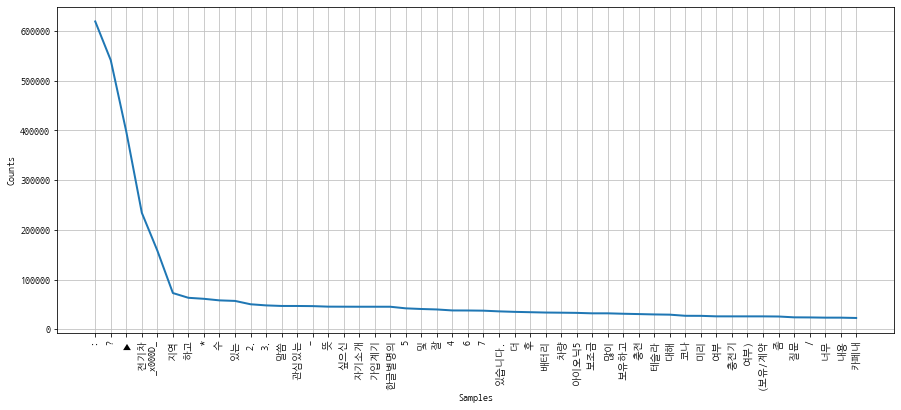

<Figure size 432x288 with 0 Axes>

In [135]:
elc_use = nltk.Text(sum_list, name='ÎÇ¥Ïö©')
plt.figure(figsize=(15,6))
elc_use.plot(50)
plt.show()
plt.savefig('ÎπàÎèÑÏàòÌååÏïÖ.png')

In [130]:
data = elc_use.vocab().most_common(300)
data

[(':', 619277),
 ('?', 541187),
 ('‚ñ∂', 397427),
 ('Ï†ÑÍ∏∞Ï∞®', 234235),
 ('_x000D_\n', 158139),
 ('ÏßÄÏó≠', 72809),
 ('ÌïòÍ≥†', 63251),
 ('*', 61226),
 ('Ïàò', 58067),
 ('ÏûàÎäî', 56987),
 ('2.', 50253),
 ('3.', 47980),
 ('ÎßêÏîÄ', 46836),
 ('Í¥ÄÏã¨ÏûàÎäî', 46802),
 ('-', 46526),
 ('Îúª', 45450),
 ('Ïã∂ÏúºÏã†', 45358),
 ('ÏûêÍ∏∞ÏÜåÍ∞ú', 45273),
 ('Í∞ÄÏûÖÍ≥ÑÍ∏∞', 45269),
 ('ÌïúÍ∏ÄÎ≥ÑÎ™ÖÏùò', 45268),
 ('5', 42022),
 ('Î∞è', 40735),
 ('Ïûò', 39791),
 ('4', 37800),
 ('6', 37703),
 ('7', 37357),
 ('ÏûàÏäµÎãàÎã§.', 35956),
 ('Îçî', 34977),
 ('ÌõÑ', 34291),
 ('Î∞∞ÌÑ∞Î¶¨', 33592),
 ('Ï∞®Îüâ', 33303),
 ('ÏïÑÏù¥Ïò§Îãâ5', 32921),
 ('Î≥¥Ï°∞Í∏à', 32012),
 ('ÎßéÏù¥', 32008),
 ('Î≥¥Ïú†ÌïòÍ≥†', 31161),
 ('Ï∂©Ï†Ñ', 30501),
 ('ÌÖåÏä¨Îùº', 29782),
 ('ÎåÄÌï¥', 29330),
 ('ÏΩîÎÇò', 27038),
 ('ÎØ∏Î¶¨', 26946),
 ('Ïó¨Î∂Ä', 25932),
 ('Ï∂©Ï†ÑÍ∏∞', 25904),
 ('Ïó¨Î∂Ä)', 25896),
 ('(Î≥¥Ïú†/Í≥ÑÏïΩ', 25891),
 ('Ï¢Ä', 25618),
 ('ÏßàÎ¨∏', 23947),
 ('/', 23771),
 ('ÎÑàÎ¨¥', 23323),
 ('ÎÇ¥Ïö©', 23309),
 ('Ïπ¥ÌéòÎÇ¥', 

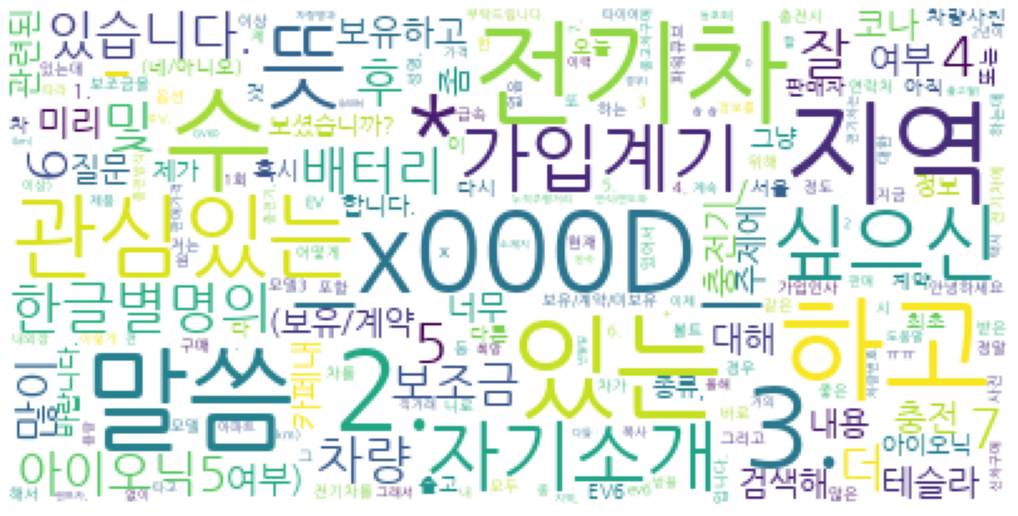

<Figure size 432x288 with 0 Axes>

In [136]:
wc = WordCloud(
    font_path='NanumGothic.ttf',
    relative_scaling=0.00001,
    background_color='white'
).generate_from_frequencies(dict(data[3:]))

plt.figure(figsize=(18,12))
plt.imshow(wc)
plt.axis('off')
plt.show()
plt.savefig('elc_usewordcloud.png')

In [113]:
from konlpy.tag import Okt 